In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv(r"./data/superstore.csv",encoding="ISO-8859-1")
df.info()
df.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820


In [7]:
# filling null values
df['Postal Code'].fillna(0,inplace=True)
df['Postal Code'] = df['Postal Code'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

/var/folders/kr/095g6hwn3398zmthh7nc03500000gn/T/ipykernel_77913/3855682483.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Postal Code'].fillna(0,inplace=True)


In [8]:
if df.duplicated().sum() > 0:
    print("duplicate rows found")
else:
    print("no duplicate rows found")
df.head(10)

no duplicate rows found


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,US-2017-109484,11/6/2017,11/12/2017,Standard Class,RB-19705,Roger Barcio,Home Office,United States,Portland,...,0,West,OFF-BI-10004738,Office Supplies,Binders,Flexible Leather- Look Classic Collection Ring...,5.6820,1,0.70,-3.7880
96,97,CA-2017-161018,11/9/2017,11/11/2017,Second Class,PN-18775,Parhena Norris,Home Office,United States,New York City,...,0,East,FUR-FU-10000629,Furniture,Furnishings,9-3/4 Diameter Round Wall Clock,96.5300,7,0.00,40.5426
97,98,CA-2017-157833,6/17/2017,6/20/2017,First Class,KD-16345,Katherine Ducich,Consumer,United States,San Francisco,...,0,West,OFF-BI-10001721,Office Supplies,Binders,Trimflex Flexible Post Binders,51.3120,3,0.20,17.9592
98,99,CA-2016-149223,9/6/2016,9/11/2016,Standard Class,ER-13855,Elpida Rittenbach,Corporate,United States,Saint Paul,...,0,Central,OFF-AP-10000358,Office Supplies,Appliances,Fellowes Basic Home/Office Series Surge Protec...,77.8800,6,0.00,22.5852


['Consumer' 'Corporate' 'Home Office']
       Segment  count
0     Consumer   5191
1    Corporate   3020
2  Home Office   1783
  Type Of Customer  count
0         Consumer   5191
1        Corporate   3020
2      Home Office   1783


([<matplotlib.patches.Wedge at 0x10f08abd0>,
 [Text(-0.06704023782468152, 1.0979551933081833, 'Consumer'),
  Text(-0.5268842285426254, -0.9656049967316049, 'Corporate'),
  Text(0.9316986876474538, -0.5847542692755757, 'Home Office')],
 [Text(-0.03656740244982628, 0.5988846508953727, '51.9%'),
  Text(-0.28739139738688657, -0.5266936345808754, '30.2%'),
  Text(0.5081992841713383, -0.318956874150314, '17.8%')])

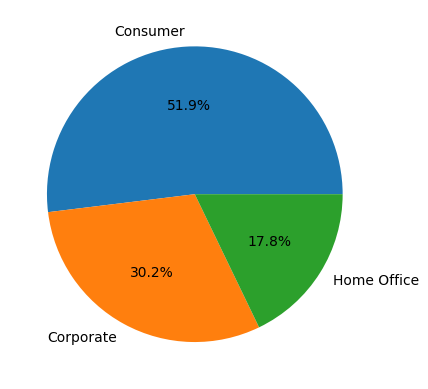

In [9]:
# types of customers
types_of_customers = df["Segment"].unique()
print(types_of_customers)
number_of_customers = df["Segment"].value_counts().reset_index()
print(number_of_customers)
number_of_customers = number_of_customers.rename(columns={'Segment' : 'Type Of Customer'})
print(number_of_customers)

# plotting the types of customers
plt.pie(number_of_customers['count'], labels=number_of_customers['Type Of Customer'], autopct='%1.1f%%')

  Type Of Customer   Total Sales
0         Consumer  1.161401e+06
1        Corporate  7.061464e+05
2      Home Office  4.296531e+05


<BarContainer object of 3 artists>

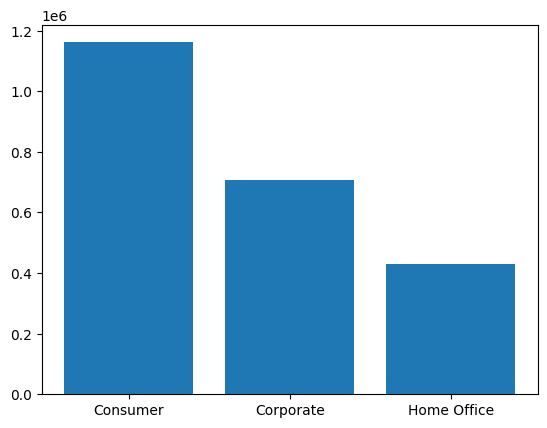

In [10]:
sales_per_segment = df.groupby('Segment')['Sales'].sum().reset_index()
sales_per_segment = sales_per_segment.rename(columns={'Segment' : 'Type Of Customer', 'Sales' : 'Total Sales'})
print(sales_per_segment)
plt.bar(sales_per_segment['Type Of Customer'], sales_per_segment['Total Sales'])

In [14]:
customers_order_frequency = df.groupby(['Customer ID', 'Customer Name', 'Segment'])['Order ID'].count().reset_index()
customers_order_frequency.rename(columns={'Order ID' : 'Total Orders'}, inplace=True)
repeat_customers = customers_order_frequency[customers_order_frequency['Total Orders'] > 1]
repeat_customers_sorted = repeat_customers.sort_values('Total Orders', ascending=False)
print(repeat_customers_sorted.head(10).reset_index(drop=True))

  Customer ID        Customer Name      Segment  Total Orders
0    WB-21850        William Brown     Consumer            37
1    MA-17560         Matt Abelman  Home Office            34
2    JL-15835             John Lee     Consumer            34
3    PP-18955           Paul Prost  Home Office            34
4    SV-20365          Seth Vernon     Consumer            32
5    JD-15895     Jonathan Doherty    Corporate            32
6    CK-12205  Chloris Kastensmidt     Consumer            32
7    EH-13765         Edward Hooks    Corporate            32
8    EP-13915           Emily Phan     Consumer            31
9    ZC-21910     Zuschuss Carroll     Consumer            31


In [15]:
customer_sales = df.groupby(["Customer ID", "Customer Name","Segment"])["Sales"].sum().reset_index()
top_sepnders = customer_sales.sort_values('Sales', ascending=False)
print(top_sepnders.head(10).reset_index(drop=True))

  Customer ID       Customer Name      Segment      Sales
0    SM-20320         Sean Miller  Home Office  25043.050
1    TC-20980        Tamara Chand    Corporate  19052.218
2    RB-19360        Raymond Buch     Consumer  15117.339
3    TA-21385        Tom Ashbrook  Home Office  14595.620
4    AB-10105       Adrian Barton     Consumer  14473.571
5    KL-16645        Ken Lonsdale     Consumer  14175.229
6    SC-20095        Sanjit Chand     Consumer  14142.334
7    HL-15040        Hunter Lopez     Consumer  12873.298
8    SE-20110        Sanjit Engle     Consumer  12209.438
9    CC-12370  Christopher Conant     Consumer  12129.072


In [16]:
types_of_shipmode=df["Ship Mode"].unique()
print(types_of_shipmode)

['Second Class' 'Standard Class' 'First Class' 'Same Day']


  Mode of Shipment  Use Frequency
0   Standard Class           5968
1     Second Class           1945
2      First Class           1538
3         Same Day            543


([<matplotlib.patches.Wedge at 0x10ff68530>,
 [Text(-0.3305657516984502, 1.0491550332548754, 'Standard Class'),
  Text(-0.3760776532491148, -1.0337144667298794, 'Second Class'),
  Text(0.7465350845565396, -0.8078894525404825, 'First Class'),
  Text(1.0840145085529618, -0.18684899048879292, 'Same Day')],
 [Text(-0.18030859183551826, 0.5722663817753865, '59.7%'),
  Text(-0.20513326540860807, -0.5638442545799341, '19.5%'),
  Text(0.4072009552126579, -0.4406669741129904, '15.4%'),
  Text(0.5912806410288882, -0.10191763117570521, '5.4%')])

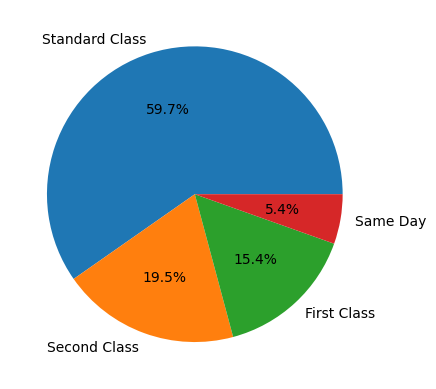

In [19]:
shipping_model = df["Ship Mode"].value_counts().reset_index()
shipping_model = shipping_model.rename(columns={'index' : 'Use Frequency', 'Ship Mode' : 'Mode of Shipment',"count":"Use Frequency"})
print(shipping_model)
plt.pie(shipping_model['Use Frequency'], labels=shipping_model['Mode of Shipment'], autopct='%1.1f%%')

In [20]:
state = df["State"].value_counts().reset_index()
state = state.rename(columns={'index' : 'State', 'State' : 'Number of Customers'})
print(state.head(10))
city = df["City"].value_counts().reset_index()
print(city.head(10))
state_sales = df.groupby('State')['Sales'].sum().reset_index()
top_sales = state_sales.sort_values('Sales', ascending=False)
print(top_sales.head(10).reset_index(drop=True))

  Number of Customers  count
0          California   2001
1            New York   1128
2               Texas    985
3        Pennsylvania    587
4          Washington    506
5            Illinois    492
6                Ohio    469
7             Florida    383
8            Michigan    255
9      North Carolina    249
            City  count
0  New York City    915
1    Los Angeles    747
2   Philadelphia    537
3  San Francisco    510
4        Seattle    428
5        Houston    377
6        Chicago    314
7       Columbus    222
8      San Diego    170
9    Springfield    163
          State        Sales
0    California  457687.6315
1      New York  310876.2710
2         Texas  170188.0458
3    Washington  138641.2700
4  Pennsylvania  116511.9140
5       Florida   89473.7080
6      Illinois   80166.1010
7          Ohio   78258.1360
8      Michigan   76269.6140
9      Virginia   70636.7200


In [21]:
city_sales = df.groupby('City')['Sales'].sum().reset_index()
top_city_sales = city_sales.sort_values('Sales', ascending=False)
print(top_city_sales.head(10).reset_index(drop=True))


            City        Sales
0  New York City  256368.1610
1    Los Angeles  175851.3410
2        Seattle  119540.7420
3  San Francisco  112669.0920
4   Philadelphia  109077.0130
5        Houston   64504.7604
6        Chicago   48539.5410
7      San Diego   47521.0290
8   Jacksonville   44713.1830
9    Springfield   43054.3420


In [22]:
state_city_sales = df.groupby(['State', 'City'])['Sales'].sum().reset_index()
print(state_city_sales.head(10))

     State           City     Sales
0  Alabama         Auburn  1766.830
1  Alabama        Decatur  3374.820
2  Alabama       Florence  1997.350
3  Alabama         Hoover   525.850
4  Alabama     Huntsville  2484.370
5  Alabama         Mobile  5462.990
6  Alabama     Montgomery  3722.730
7  Alabama     Tuscaloosa   175.700
8  Arizona       Avondale   946.808
9  Arizona  Bullhead City    22.288


['Furniture' 'Office Supplies' 'Technology']
['Bookcases' 'Chairs' 'Labels' 'Tables' 'Storage' 'Furnishings' 'Art'
 'Phones' 'Binders' 'Appliances' 'Paper' 'Accessories' 'Envelopes'
 'Fasteners' 'Supplies' 'Machines' 'Copiers']
          Category  Sub-Category
1  Office Supplies             9
0        Furniture             4
2       Technology             4
           Category Sub-Category        Sales
0         Furniture    Bookcases  114879.9963
1         Furniture       Chairs  328449.1030
2         Furniture  Furnishings   91705.1640
3         Furniture       Tables  206965.5320
4   Office Supplies   Appliances  107532.1610
5   Office Supplies          Art   27118.7920
6   Office Supplies      Binders  203412.7330
7   Office Supplies    Envelopes   16476.4020
8   Office Supplies    Fasteners    3024.2800
9   Office Supplies       Labels   12486.3120
10  Office Supplies        Paper   78479.2060
11  Office Supplies      Storage  223843.6080
12  Office Supplies     Supplies   46673.5

([<matplotlib.patches.Wedge at 0x10ff870b0>,
 [Text(0.5806250883943506, 0.9342775319609546, 'Furniture'),
  Text(-1.0908936259884885, 0.14124835141582348, 'Office Supplies'),
  Text(0.45584989144183646, -1.0010998334194579, 'Technology')],
 [Text(0.31670459366964576, 0.509605926524157, '32.3%'),
  Text(-0.5950328869028119, 0.07704455531772189, '31.3%'),
  Text(0.24864539533191077, -0.5460544545924314, '36.4%')])

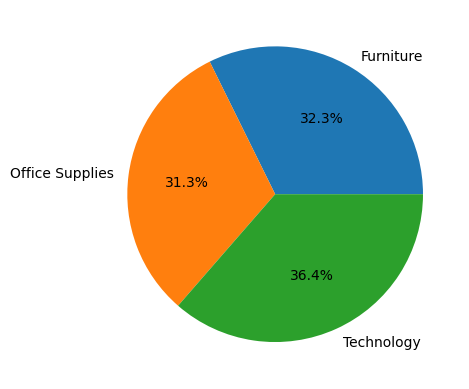

In [23]:
product_category = df["Category"].unique()
print(product_category)
product_subcategory = df["Sub-Category"].unique()
print(product_subcategory)
subcategory_count = df.groupby('Category')['Sub-Category'].nunique().reset_index()
subcategory_count = subcategory_count.sort_values('Sub-Category', ascending=False)
print(subcategory_count)

# sales per category
subcategory_count_sales = df.groupby(["Category", "Sub-Category"])["Sales"].sum().reset_index()
subcategory_count_sales.sort_values('Sales', ascending=False)
print(subcategory_count_sales)

# products with highest sales
product_category_sales = df.groupby('Category')['Sales'].sum().reset_index()
print(product_category_sales.sort_values('Sales', ascending=False))
plt.pie(product_category_sales['Sales'], labels=product_category_sales['Category'], autopct='%1.1f%%')

<BarContainer object of 17 artists>

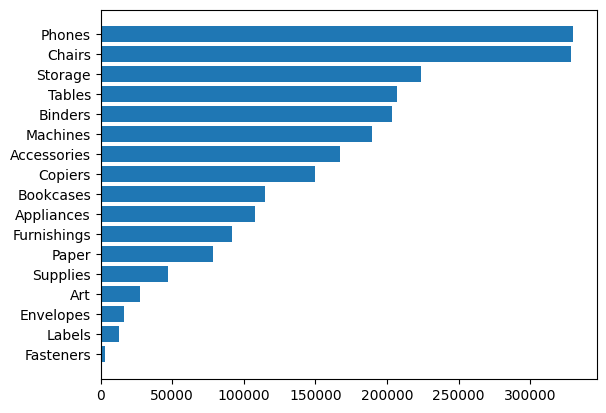

In [24]:
subcategory_count_sales= subcategory_count_sales.sort_values('Sales', ascending=True)
plt.barh(subcategory_count_sales['Sub-Category'], subcategory_count_sales['Sales'])

   Year  Total Sales
0  2014  484247.4981
1  2015  470532.5090
2  2016  609205.5980
3  2017  733215.2552


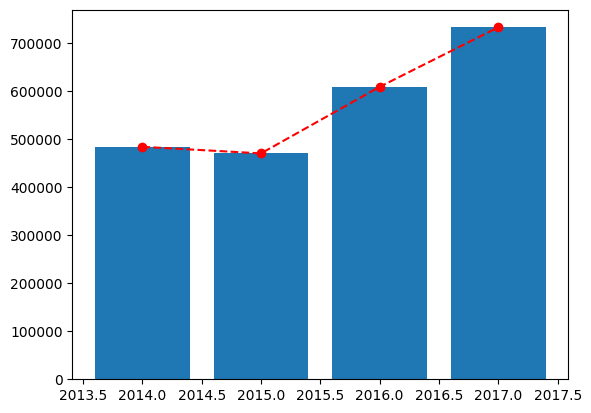

In [27]:
df['Order Date'] = pd.to_datetime(df['Order Date'],dayfirst=True,format='mixed')
yearly_sales = df.groupby(df['Order Date'].dt.year)['Sales'].sum().reset_index()
yearly_sales.rename(columns={'Order Date' : 'Year',"Sales":"Total Sales"}, inplace=True)
print(yearly_sales)
plt.bar(yearly_sales['Year'], yearly_sales['Total Sales'])

# plot
plt.plot(yearly_sales['Year'], yearly_sales['Total Sales'], marker='o',linestyle='--', color='r')


     Quarter  Total Sales
0 2015-03-31   90952.3496
1 2015-06-30   97852.8812
2 2015-09-30  145554.2330
3 2015-12-31  136173.0452


/var/folders/kr/095g6hwn3398zmthh7nc03500000gn/T/ipykernel_77913/1702423509.py:4: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarterly_sales = year_sales.resample("Q",on="Order Date")["Sales"].sum().reset_index()


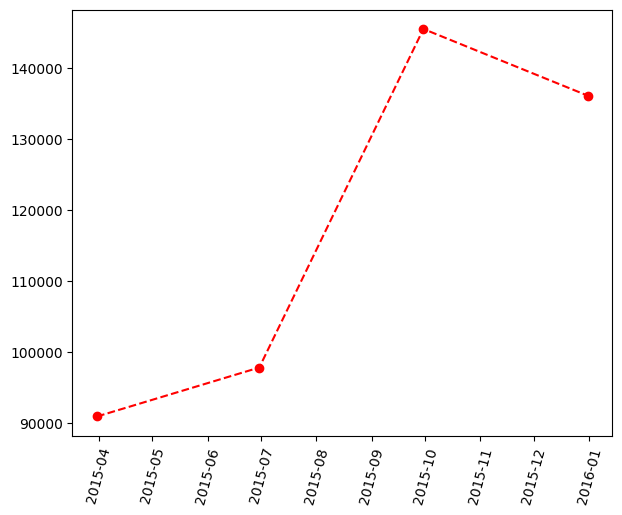

In [30]:
# yearly sales
df["Order Date"]=pd.to_datetime(df["Order Date"],dayfirst=True,format='mixed')
year_sales = df[df["Order Date"].dt.year == 2015]
quarterly_sales = year_sales.resample("Q",on="Order Date")["Sales"].sum().reset_index()
quarterly_sales.rename(columns={'Order Date' : 'Quarter',"Sales":"Total Sales"}, inplace=True)
print(quarterly_sales)

plt.plot(quarterly_sales['Quarter'], quarterly_sales['Total Sales'], marker='o',linestyle='--', color='r')
plt.tight_layout()
plt.xticks(rotation=75)
plt.show()

        Month  Total Sales
0  2016-01-31   38048.1840
1  2016-02-29   49238.4100
2  2016-03-31   49612.0450
3  2016-04-30   45192.2780
4  2016-05-31   64964.3218
5  2016-06-30   38991.9430
6  2016-07-31   42773.3950
7  2016-08-31   46339.9884
8  2016-09-30   41985.1423
9  2016-10-31   52268.1500
10 2016-11-30   66837.5850
11 2016-12-31   72954.1555


/var/folders/kr/095g6hwn3398zmthh7nc03500000gn/T/ipykernel_77913/3551332806.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = year_sales.resample("M",on="Order Date")["Sales"].sum().reset_index()


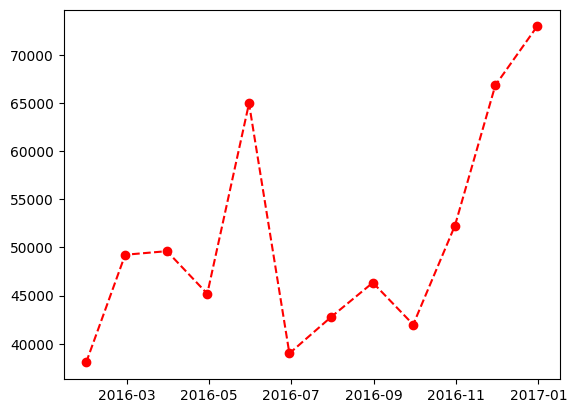

In [31]:
df["Order Date"]=pd.to_datetime(df["Order Date"],dayfirst=True,format='mixed')
year_sales = df[df["Order Date"].dt.year == 2016]
monthly_sales = year_sales.resample("M",on="Order Date")["Sales"].sum().reset_index()
monthly_sales.rename(columns={'Order Date' : 'Month',"Sales":"Total Sales"}, inplace=True)
print(monthly_sales)
plt.plot(monthly_sales['Month'], monthly_sales['Total Sales'], marker='o',linestyle='--', color='r')